**SONAL SHANKHWAR**

120221302


By submitting this exam, I declare

(1) that all work of it is my own;

(2) that I did not seek whole or partial solutions for any part of my submission from others; and

(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.

# TASK 1: BASIC ENCODER


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed



TensorFlow version: 2.8.0
Is Executing Eagerly? True


In [ ]:
#reconstruction error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#optimization
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#training loop
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [ ]:
#process the data set
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32) 
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)


## BASIC DENSE MODEL - GIVEN

Epoch 1/100. Loss: 9.572685241699219
Epoch 2/100. Loss: 6.461709022521973
Epoch 3/100. Loss: 5.986604690551758
Epoch 4/100. Loss: 5.724266529083252
Epoch 5/100. Loss: 5.576017379760742
Epoch 6/100. Loss: 5.488312721252441
Epoch 7/100. Loss: 5.469663619995117
Epoch 8/100. Loss: 5.39009952545166
Epoch 9/100. Loss: 5.351070404052734
Epoch 10/100. Loss: 5.30735445022583
Epoch 11/100. Loss: 5.274345397949219
Epoch 12/100. Loss: 5.250358581542969
Epoch 13/100. Loss: 5.2349162101745605
Epoch 14/100. Loss: 5.219637870788574
Epoch 15/100. Loss: 5.229310035705566
Epoch 16/100. Loss: 5.189755916595459
Epoch 17/100. Loss: 5.146702289581299
Epoch 18/100. Loss: 5.12844705581665
Epoch 19/100. Loss: 5.113672256469727
Epoch 20/100. Loss: 5.1020989418029785
Epoch 21/100. Loss: 5.088704586029053
Epoch 22/100. Loss: 5.086627006530762
Epoch 23/100. Loss: 5.076586723327637
Epoch 24/100. Loss: 5.079728603363037
Epoch 25/100. Loss: 5.086864948272705
Epoch 26/100. Loss: 5.057441234588623
Epoch 27/100. Loss: 5.

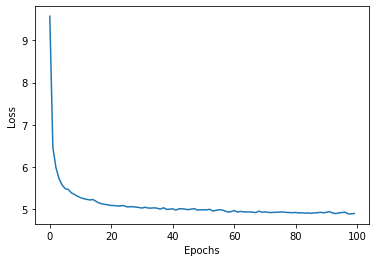

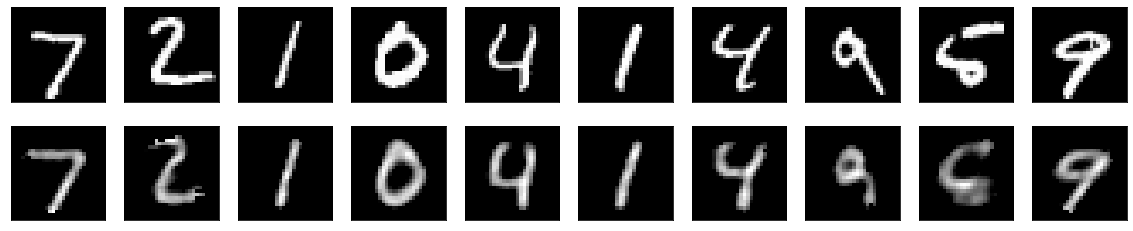

In [ ]:
#training model
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## DENSE MODEL 1

Multi layer:

Encoder: (256,128,128)

Decoder: (128,256,784)

Learning rate: 1e-3

Loss: MSE

Optimizer: Adam

Batch Size: 256

TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100. Loss: 8.194228172302246
Epoch 2/100. Loss: 4.041183948516846
Epoch 3/100. Loss: 3.4256935119628906
Epoch 4/100. Loss: 3.109689950942993
Epoch 5/100. Loss: 2.914499521255493
Epoch 6/100. Loss: 2.7524189949035645
Epoch 7/100. Loss: 2.6446802616119385
Epoch 8/100. Loss: 2.550863027572632
Epoch 9/100. Loss: 2.489907741546631
Epoch 10/100. Loss: 2.425328016281128
Epoch 11/100. Loss: 2.372377634048462
Epoch 12/100. Loss: 2.3331241607666016
Epoch 13/100. Loss: 2.2979202270507812
Epoch 14/100. Loss: 2.2671308517456055
Epoch 15/100. Loss: 2.231872320175171
Epoch 16/100. Loss: 2.2165286540985107
Epoch 17/100. Loss: 2.190441846847534
Epoch 18/100. Loss: 2.160693645477295
Epoch 19/100. Loss: 2.150905132293701
Epoch 20/100. Loss: 2.1332850456237793
Epoch 21/100. Loss: 2.1018264293670654
Epoch 22/100. Loss: 2.096128225326538
Epoch 23/100. Loss: 2.087024211883545
Epoch 24/100. Loss: 2.06911563873291
Epoch 25/100. Loss: 2.05659294128417

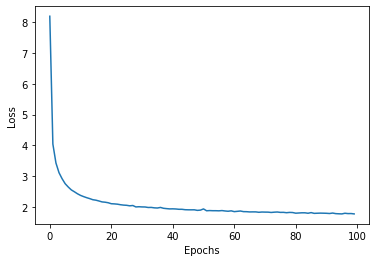

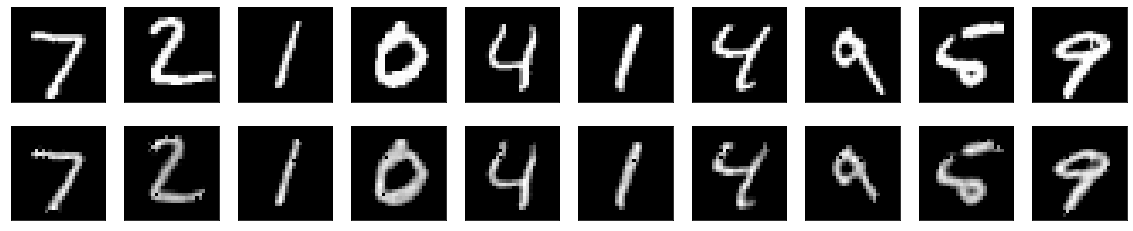

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

class Encoder_1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_1, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu) #added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu) 
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation_1 = self.hidden_layer_1(input_features)
        activation = self.hidden_layer_2(activation_1)
        return self.output_layer(activation)

class Decoder_1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_1, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)#added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation_1 = self.hidden_layer_1(code)
        activation = self.hidden_layer_2(activation_1)
        return self.output_layer(activation)

class Autoencoder_1(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_1, self).__init__()
    self.loss = []
    self.encoder = Encoder_1(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_1(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#training model
dense_model_1 = Autoencoder_1(intermediate_dim=256, original_dim=784) # changed intermediate dimension to 256
dense_opt_1 = tf.keras.optimizers.Adam(learning_rate=1e-3) #changed learning rate to 1e-3

train_loop(dense_model_1, dense_opt_1, loss, training_dataset, 100)

plt.plot(range(100), dense_model_1.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(dense_model_1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## DENSE MODEL 2

Multi layer:

Encoder: (256,128,64,64) 

Decoder: (64,128,256,784) 

Sigmoid activation function in decoder output

Learning rate: 1e-3

Optimizer: Adam

Loss: MSE

Batch Size: 256

TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100. Loss: 14.866830825805664
Epoch 2/100. Loss: 7.474809169769287
Epoch 3/100. Loss: 5.685832500457764
Epoch 4/100. Loss: 4.75998592376709
Epoch 5/100. Loss: 4.177670955657959
Epoch 6/100. Loss: 3.8090906143188477
Epoch 7/100. Loss: 3.532874822616577
Epoch 8/100. Loss: 3.288480043411255
Epoch 9/100. Loss: 3.0961270332336426
Epoch 10/100. Loss: 2.9556725025177
Epoch 11/100. Loss: 2.841780424118042
Epoch 12/100. Loss: 2.767315149307251
Epoch 13/100. Loss: 2.673229217529297
Epoch 14/100. Loss: 2.5795540809631348
Epoch 15/100. Loss: 2.496194362640381
Epoch 16/100. Loss: 2.4260523319244385
Epoch 17/100. Loss: 2.3659842014312744
Epoch 18/100. Loss: 2.309908628463745
Epoch 19/100. Loss: 2.257075071334839
Epoch 20/100. Loss: 2.2062480449676514
Epoch 21/100. Loss: 2.1591334342956543
Epoch 22/100. Loss: 2.1232125759124756
Epoch 23/100. Loss: 2.09702730178833
Epoch 24/100. Loss: 2.0643441677093506
Epoch 25/100. Loss: 2.019636869430542


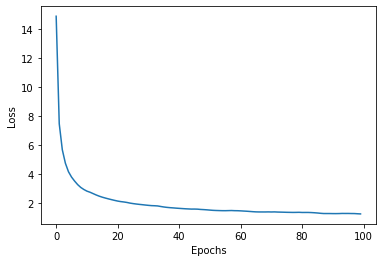

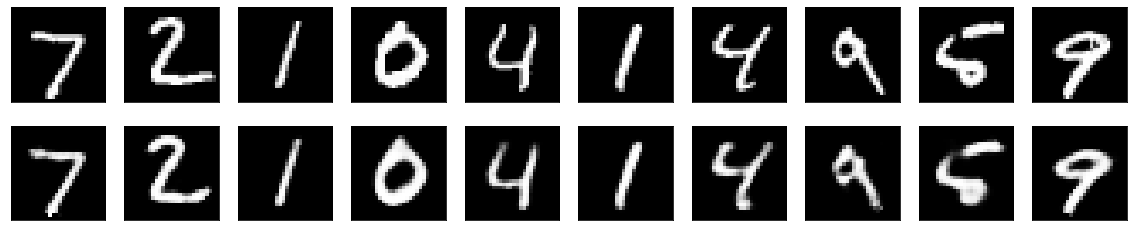

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

class Encoder_2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_2, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu) #added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation_1 = self.hidden_layer_1(input_features)
        activation_2 = self.hidden_layer_2(activation_1)
        activation = self.hidden_layer_3(activation_2)
        return self.output_layer(activation)

class Decoder_2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_2, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu) #added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid) #activation function changed to sigmoid
  
    def call(self, code):
        activation_1 = self.hidden_layer_1(code)
        activation = self.hidden_layer_2(activation_1)
        return self.output_layer(activation)

class Autoencoder_2(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_2, self).__init__()
    self.loss = []
    self.encoder = Encoder_2(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_2(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed


#training model
dense_model_2 = Autoencoder_2(intermediate_dim=256, original_dim=784) #intermediate dimension 256
opt_2 = tf.keras.optimizers.Adam(learning_rate=1e-3) #loss 1e-3

train_loop(dense_model_2, opt_2, loss, training_dataset, 100)

plt.plot(range(100), dense_model_2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(dense_model_2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## DENSE MODEL 3

Multi layer: 

Encoder: (256,128,64,64)

Decoder: (64,128,256,784)

Sigmoid activation function in decoder output

Learning rate: 1e-3

Optimizer: Adam

Loss: MSE

Batch size: 500

TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100. Loss: 9.530001640319824
Epoch 2/100. Loss: 5.0874738693237305
Epoch 3/100. Loss: 3.6829564571380615
Epoch 4/100. Loss: 3.049417018890381
Epoch 5/100. Loss: 2.671464681625366
Epoch 6/100. Loss: 2.4015250205993652
Epoch 7/100. Loss: 2.1880433559417725
Epoch 8/100. Loss: 2.053661823272705
Epoch 9/100. Loss: 1.9435415267944336
Epoch 10/100. Loss: 1.857494592666626
Epoch 11/100. Loss: 1.7783558368682861
Epoch 12/100. Loss: 1.7261968851089478
Epoch 13/100. Loss: 1.6522796154022217
Epoch 14/100. Loss: 1.5842828750610352
Epoch 15/100. Loss: 1.5273737907409668
Epoch 16/100. Loss: 1.4755306243896484
Epoch 17/100. Loss: 1.429357886314392
Epoch 18/100. Loss: 1.3953170776367188
Epoch 19/100. Loss: 1.3517513275146484
Epoch 20/100. Loss: 1.3255937099456787
Epoch 21/100. Loss: 1.2932088375091553
Epoch 22/100. Loss: 1.267743468284607
Epoch 23/100. Loss: 1.2489356994628906
Epoch 24/100. Loss: 1.2231523990631104
Epoch 25/100. Loss: 1.19814

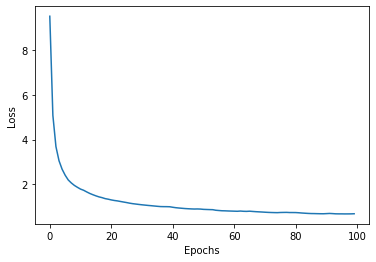

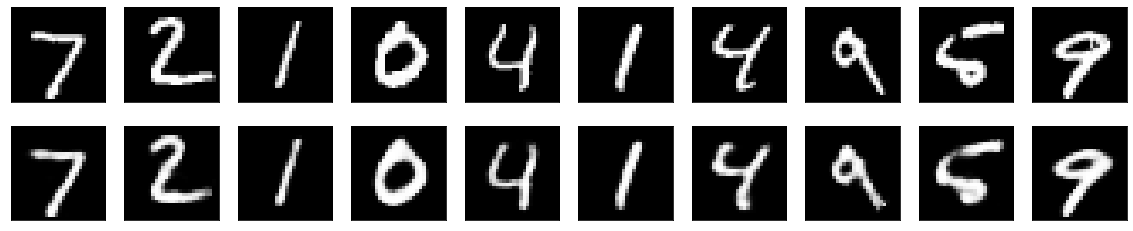

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras import regularizers

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

class Encoder_3(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_3, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu) #added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation_1 = self.hidden_layer_1(input_features)
        activation_2 = self.hidden_layer_2(activation_1)
        activation = self.hidden_layer_3(activation_2)
        return self.output_layer(activation)

class Decoder_3(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_3, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)#added more layers
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid) #activation function sigmoid
  
    def call(self, code):
        activation_1 = self.hidden_layer_1(code)
        activation_2 = self.hidden_layer_2(activation_1)
        activation = self.hidden_layer_3(activation_2)
        return self.output_layer(activation)

class Autoencoder_3(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_3, self).__init__()
    self.loss = []
    self.encoder = Encoder_3(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_3(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32) 
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(500) #batch size 500

#training model
dense_model_3 = Autoencoder_3(intermediate_dim=256, original_dim=784) #intermediate dimension 256
opt_3 = tf.keras.optimizers.Adam(learning_rate=1e-3) #learning rate 1e-3

train_loop(dense_model_3, opt_3, loss, training_dataset, 100)


plt.plot(range(100), dense_model_3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(dense_model_3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN - GIVEN

Encoder 
        
        Convolution (16, 8, 8)
        Max-pooling (2, 2, 2)

Decoder 
        
        Convolution (8, 8, 16, 1)
        Max-pooling (2, 2, 2)
        Sigmoid activation function in decoder output

Loss: MSE

Optimizer: Adadelta

Batch size: 128

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
cnn_encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(cnn_encoded) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
cnn_decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  

cnn_autoencoder = tf.keras.models.Model(input_img, cnn_decoded)
cnn_autoencoder.compile(optimizer='adadelta', loss='mse') #changed loss function to mse in order to compare results with dense model

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
cnn_model = cnn_autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2256 - val_loss: 0.2247
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2230 - val_loss: 0.2215
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2188 - val_loss: 0.2161
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2115 - val_loss: 0.2065
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1979 - val_loss: 0.1881
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1728 - val_loss: 0.1571
Epoch 7/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1421 - val_loss: 0.1323
Epoch 8/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1259 - val_loss: 0.1237
Epoch 9/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1205 - val_loss: 0.1206
Epoch 10/100
469/469 [==============================] - 7s 15ms/step - loss: 0.118

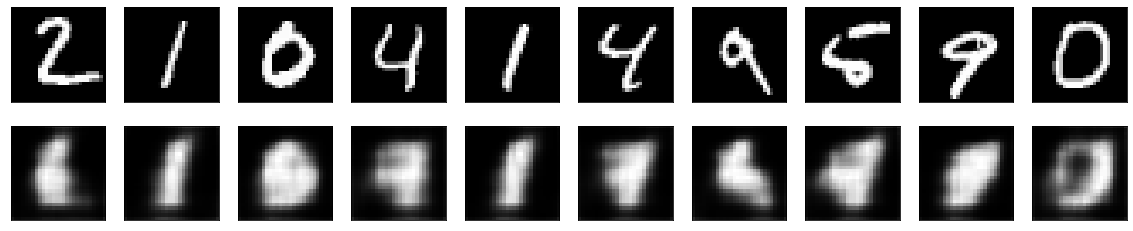

In [ ]:
img_decoded = cnn_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(img_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN MODEL 1

Encoder 
        
        Convolution (16, 8, 8)
        Max-pooling (2, 2, 2)

Decoder 
        
        Convolution (8, 8, 16, 1) 
        Max-pooling (2, 2, 2)
        Sigmoid activation function in decoder output

Loss: MSE

Optimizer: Adam

Batch size: 128

Epoch 1/100
469/469 [==============================] - 9s 16ms/step - loss: 0.0595 - val_loss: 0.0291
Epoch 2/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0226 - val_loss: 0.0204
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0167 - val_loss: 0.0157
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0148 - val_loss: 0.0142
Epoch 7/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0142 - val_loss: 0.0136
Epoch 8/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 9/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0135 - val_loss: 0.0130
Epoch 10/100
469/469 [==============================] - 7s 15ms/step - loss: 0.013

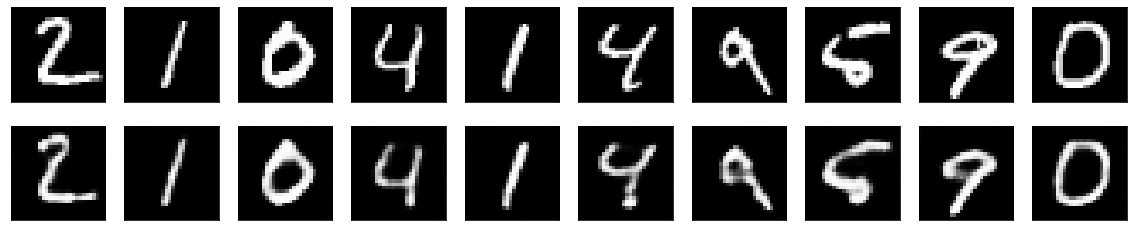

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
cnn_encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(cnn_encoded) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
cnn_decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  #change activation function 

cnn_autoencoder_1 = tf.keras.models.Model(input_img, cnn_decoded)
cnn_autoencoder_1.compile(optimizer='adam', loss='mse') #changed optimizer and loss function to mse in order to compare results with dense model

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
cnn_model_1 = cnn_autoencoder_1.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

img_decoded_1 = cnn_autoencoder_1.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(img_decoded_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN COMPLEX MODEL


Encoder 
        
        Convolution (128, 64, 32)
        Max-pooling (2, 2, 2)
        L2 Activity regularizer in encoder output

Decoder 
        
        Convolution (32, 64, 128, 1) 
        Max-pooling (2, 2, 2)
        Sigmoid activation function in decoder output

BatchNormalization

Loss: MSE

Optimizer: Adam

Batch size: 128

Epoch 1/100
469/469 [==============================] - 38s 59ms/step - loss: 0.0296 - val_loss: 0.0485
Epoch 2/100
469/469 [==============================] - 27s 58ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 3/100
469/469 [==============================] - 27s 57ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 4/100
469/469 [==============================] - 28s 59ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 5/100
469/469 [==============================] - 28s 59ms/step - loss: 0.0061 - val_loss: 0.0074
Epoch 6/100
469/469 [==============================] - 28s 59ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 7/100
469/469 [==============================] - 28s 59ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 8/100
469/469 [==============================] - 28s 60ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 9/100
469/469 [==============================] - 28s 60ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/100
469/469 [==============================] - 27s 57ms/step - l

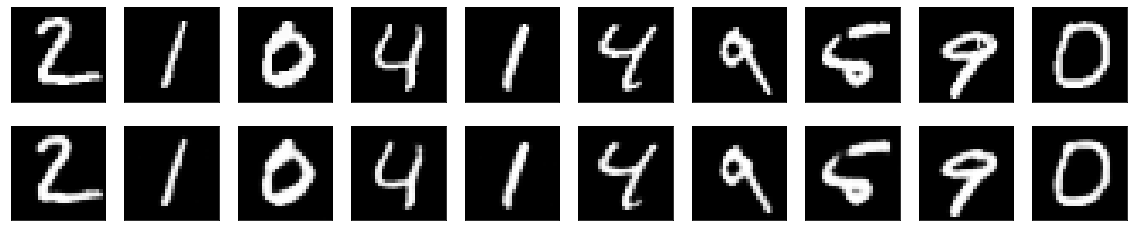

In [ ]:
from keras import regularizers

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x) #Added batch normalization
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
cnn_encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same', activity_regularizer=regularizers.l2(10e-5))(x) # added regularizer

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(cnn_encoded) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x) #Added batch normalization
cnn_decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  #changed activation function to sigmoid

cnn_complx_autoencoder = tf.keras.models.Model(input_img, cnn_decoded)
cnn_complx_autoencoder.compile(optimizer='adam', loss='mse') #changed optimizer to adam & loss function to mse in order to compare results with dense model

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
cnn_complx_model = cnn_complx_autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

img_decoded_cmplx = cnn_complx_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(img_decoded_cmplx[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# TASK 2. DENOISING AUTOENCODER

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.) #referenced from the keras blog given in the references
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = x_train_noisy.astype(np.float32) 
x_test_noisy = x_test_noisy.astype(np.float32)

x_train_noisy_reshpd = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy_reshpd =  np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

x_train_reshpd = np.reshape(x_train, (len(x_train), 784))
x_test_reshaped = np.reshape(x_test, (len(x_test), 784))

training_noisy_dataset = tf.data.Dataset.from_tensor_slices(x_train_noisy_reshpd).batch(256)

## DENSE MODEL 1 - DENOISING

Encoder: (256, 128, 64, 64)

Decoder: (64, 128, 256, 784)
          
          activation function sigmoid in Decoder output 

Learning rate: 1e-3

Optimizer: Adam

Loss: MSE

Batch size: 256

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0696 - val_loss: 0.0619
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0577 - val_loss: 0.0531
Epoch 3/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0495 - val_loss: 0.0470
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0461 - val_loss: 0.0454
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0441 - val_loss: 0.0431
Epoch 6/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0423 - val_loss: 0.0417
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0409 - val_loss: 0.0416
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0399 - val_loss: 0.0404
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0391 - val_loss: 0.0396
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0383 - val_lo

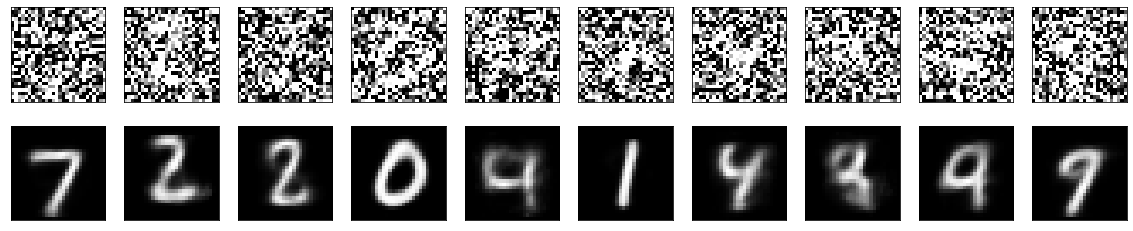

In [ ]:
class Encoder_4(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_4, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu) #added layers
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation_1 = self.hidden_layer_1(input_features)
        activation_2 = self.hidden_layer_2(activation_1)
        activation = self.hidden_layer_3(activation_2)
        return self.output_layer(activation)

class Decoder_4(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_4, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu) #added layers
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid) #changed activation function
  
    def call(self, code):
        activation_1 = self.hidden_layer_1(code)
        activation_2 = self.hidden_layer_2(activation_1)
        activation = self.hidden_layer_3(activation_2)
        return self.output_layer(activation)

class Autoencoder_4(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_4, self).__init__()
    self.loss = []
    self.encoder = Encoder_4(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_4(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

dense_noisy_model_1 = Autoencoder_4(intermediate_dim=256,original_dim = 784)
dense_noisy_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE) #learning rate 1e-3
dense_noisy_model_1.fit(x_train_noisy_reshpd, x_train_reshpd, epochs=100, batch_size=256, #batch size 256
                shuffle=True, validation_data=(x_test_noisy_reshpd, x_test_reshaped))

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy_reshpd[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy_reshpd)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## DENSE MODEL 2 - DENOISING

Encoder: (256, 128, 128)

Decoder: (128, 256, 784)
          
          activation function sigmoid in Decoder output 

Learning rate: 1e-3

Optimizer: Adam

Loss: MSE

Batch size: 256

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0691 - val_loss: 0.0577
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0510 - val_loss: 0.0463
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0449 - val_loss: 0.0431
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0420 - val_loss: 0.0414
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0391 - val_loss: 0.0392
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0382 - val_loss: 0.0381
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0374 - val_loss: 0.0386
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0367 - val_loss: 0.0368
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0360 - val_lo

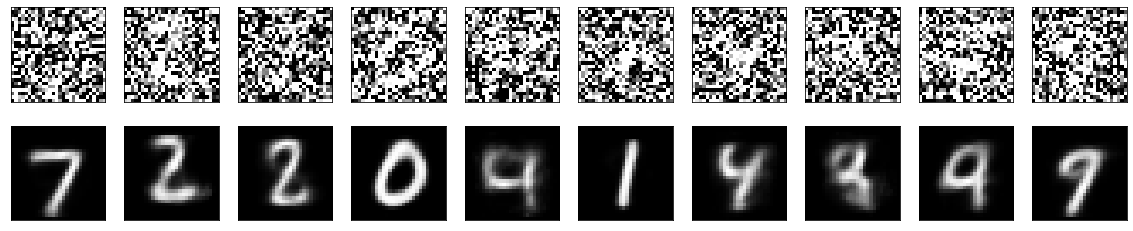

In [ ]:
class Encoder_5(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_5, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu) #added more layer
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation_1 = self.hidden_layer_1(input_features)
        activation = self.hidden_layer_2(activation_1)
        return self.output_layer(activation)

class Decoder_5(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_5, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu) #added more layer
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation_1 = self.hidden_layer_1(code)
        activation = self.hidden_layer_2(activation_1)
        return self.output_layer(activation)

class Autoencoder_5(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_5, self).__init__()
    self.loss = []
    self.encoder = Encoder_5(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_5(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

dense_noisy_model_2 = Autoencoder_5(intermediate_dim=256,original_dim = 784)
dense_noisy_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE) #learning rate 1e-3
dense_noisy_model_2.fit(x_train_noisy_reshpd, x_train_reshpd, epochs=100, batch_size=256, 
                shuffle=True, validation_data=(x_test_noisy_reshpd, x_test_reshaped))

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy_reshpd[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy_reshpd)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN MODEL 1 - DENOISING

Encoder 
        
        Convolution (16, 8, 8)
        Max-pooling (2, 2, 2)

Decoder 
        
        Convolution (8, 8, 16, 1) 
        Max-pooling (2, 2, 2)
        Sigmoid activation function in decoder output

Loss: MSE

Optimizer: Adam

Batch size: 128

In [ ]:
#training CNN model 1 formed in Task 1 with noisy data
cnn_autoencoder_1.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0462 - val_loss: 0.0446
Epoch 2/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0431 - val_loss: 0.0440
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0421 - val_loss: 0.0427
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0415 - val_loss: 0.0420
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0409 - val_loss: 0.0404
Epoch 6/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 7/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0401 - val_loss: 0.0402
Epoch 8/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0397 - val_loss: 0.0399
Epoch 9/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0395 - val_loss: 0.0398
Epoch 10/100
469/469 [==============================] - 8s 17ms/step - loss: 0.039

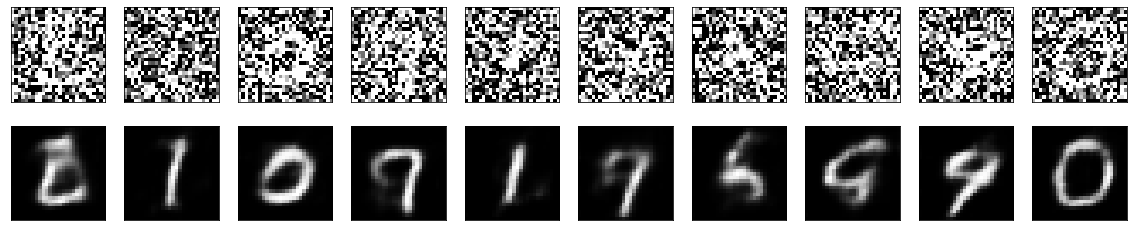

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(cnn_autoencoder_1(x_test_noisy)[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN MODEL COMPLEX - DENOISING

Encoder 
        
        Convolution (128, 64, 32)
        Max-pooling (2, 2, 2)
        L2 Activity regularizer in encoder output

Decoder 
        
        Convolution (32, 64, 128, 1) 
        Max-pooling (2, 2, 2)
        Sigmoid activation function in decoder output

BatchNormalization

Loss: MSE

Optimizer: Adam

Batch size: 128

In [ ]:
#training CNN complex model formed in task 1 with noisy data 
cnn_complx_autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 31s 66ms/step - loss: 0.0259 - val_loss: 0.0292
Epoch 2/100
469/469 [==============================] - 29s 62ms/step - loss: 0.0258 - val_loss: 0.0291
Epoch 3/100
469/469 [==============================] - 26s 56ms/step - loss: 0.0258 - val_loss: 0.0291
Epoch 4/100
469/469 [==============================] - 26s 56ms/step - loss: 0.0258 - val_loss: 0.0290
Epoch 5/100
469/469 [==============================] - 28s 60ms/step - loss: 0.0258 - val_loss: 0.0292
Epoch 6/100
469/469 [==============================] - 27s 57ms/step - loss: 0.0258 - val_loss: 0.0289
Epoch 7/100
469/469 [==============================] - 27s 59ms/step - loss: 0.0258 - val_loss: 0.0297
Epoch 8/100
469/469 [==============================] - 26s 56ms/step - loss: 0.0258 - val_loss: 0.0298
Epoch 9/100
469/469 [==============================] - 27s 59ms/step - loss: 0.0258 - val_loss: 0.0295
Epoch 10/100
469/469 [==============================] - 26s 56ms/step - l

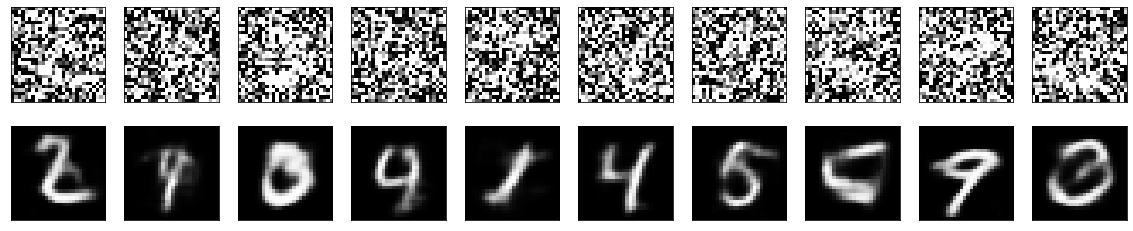

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(cnn_complx_autoencoder(x_test_noisy)[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# TASK 3: TEXT RECONSTRUCTION APPLICATION

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import RootMeanSquaredError
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

np.random.seed(111)
   


In [3]:
train_dir = Path('/datasets/train/')
train_clean_dir = Path('/datasets/train_cleaned')
test_dir = Path('/datasets/test')

# Train dataset
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip"

# Train labels
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/train_cleaned.zip"

# Test dataset
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/test.zip"

!unzip /datasets/train.zip -d /datasets/
!unzip /datasets/train_cleaned.zip -d /datasets/
!unzip /datasets/test.zip -d /datasets/

print(train_dir)
print(list(train_dir.glob('**/*.png')))
image_count = len(list(train_dir.glob('**/*.png')))

--2022-03-28 21:35:51--  https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip [following]
--2022-03-28 21:35:51--  https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19407030 (19M) [application/zip]
Saving to: ‘/datasets/train.zip’

train.zip           100%[===================>]  18.51M  92.3MB/s    in 0.2s    

2022-03-28 21:35:51 (92.3 MB/s) - ‘/datasets/train.zip’ saved [19407030/19407030]

--2022-03-28 21:35:52

In [4]:
X = []
Y = []
X_noisy = []

train_images = os.listdir(train_dir)

train_labels = os.listdir(train_clean_dir)

test_images = os.listdir(test_dir)
for img in train_images:
  img = load_img(train_dir /img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  X.append(img)

for img in train_labels:
  img = load_img(train_clean_dir/ img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  Y.append(img)

for img in test_images:
  img = load_img(test_dir/ img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  X_noisy.append(img)

X = np.array(X)
Y = np.array(Y)
X_noisy = np.array(X_noisy)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


## DENSE MODEL - MULTI LAYER

Encoder: (128, 64, 32, 16)

Decoder: (16,32,64,128, 226800)
          
          Sigmoid activation function in output layer of decoder
          Relu activation function in each dense layer
Kernel initializer with each dense layer

Batch normalization after every dense layer

Learning rate: 1e-2

Optimizer: Adam

Loss: RMSE

Batch Size: 30


In [4]:
import tensorflow as tf
def dense_txt_autoencder():
  orig_dim = 226800 #42*540*1 = 226800
  input_img = Input(shape=(226800))
  x = Dense(128, activation='relu', kernel_initializer='he_normal')(input_img) #added kernel initialization
  x = tf.keras.layers.BatchNormalization()(x) #added batch normalization
  x = Dense(64, activation='relu', kernel_initializer='he_normal')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = Dense(32, activation='relu', kernel_initializer='he_normal')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = Dense(16, activation='relu', kernel_initializer='he_normal')(x)
  encoded = tf.keras.layers.BatchNormalization()(x)

  x = Dense(16, activation='relu', kernel_initializer='he_normal')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = Dense(32, activation='relu', kernel_initializer='he_normal')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = Dense(64, activation='relu', kernel_initializer='he_normal')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  decoded = Dense(226800, activation='sigmoid')(x) #activation function sigmoid
  
  autoencoder = Model(inputs=input_img, outputs=decoded)
  autoencoder.compile(optimizer=Adam(learning_rate = 1e-2), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #loss 1e-2
  return autoencoder

txt_dense_autoencoder = dense_txt_autoencder()

In [9]:
X_train_reshp = np.reshape(X_train, (len(X_train), 226800))
X_valid_reshp = np.reshape(X_valid, (len(X_valid), 226800))
Y_train_reshp = np.reshape(y_train, (len(y_train), 226800))
Y_valid_reshp = np.reshape(y_valid, (len(y_valid), 226800))

X_test_reshp  = np.reshape(X_noisy, (len(X_noisy), 226800))

txt_dense_autoencoder.fit(X_train_reshp, Y_train_reshp, epochs=100, batch_size=30, validation_data=(X_valid_reshp, Y_valid_reshp), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
5/5 [==============================] - 1s 107ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256
Epoch 2/100
5/5 [==============================] - 0s 98ms/step - loss: 0.0210 - root_mean_squared_error: 0.1448 - val_loss: 0.1086 - val_root_mean_squared_error: 0.3295
Epoch 3/100
5/5 [==============================] - 0s 97ms/step - loss: 0.0285 - root_mean_squared_error: 0.1688 - val_loss: 0.1145 - val_root_mean_squared_error: 0.3384
Epoch 4/100
5/5 [==============================] - 1s 111ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - val_loss: 0.1201 - val_root_mean_squared_error: 0.3466
Epoch 5/100
5/5 [==============================] - 0s 101ms/step - loss: 0.0237 - root_mean_squared_error: 0.1540 - val_loss: 0.1175 - val_root_mean_squared_error: 0.3428
Epoch 6/100
5/5 [==============================] - 0s 90ms/step - loss: 0.0263 - root_mean_squared_error: 0.1622 - val_loss: 0.1076 - val_root_mean

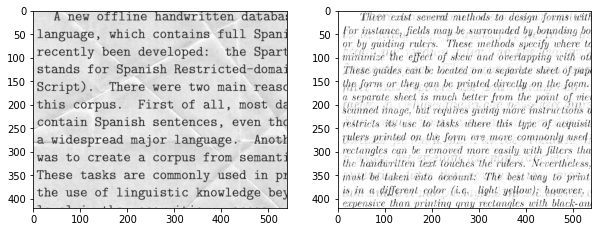

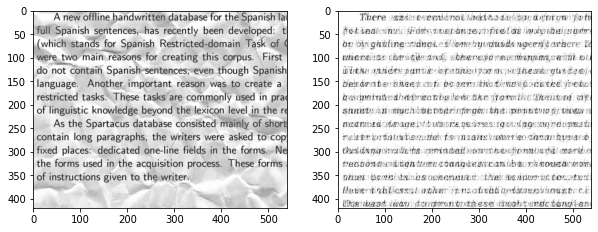

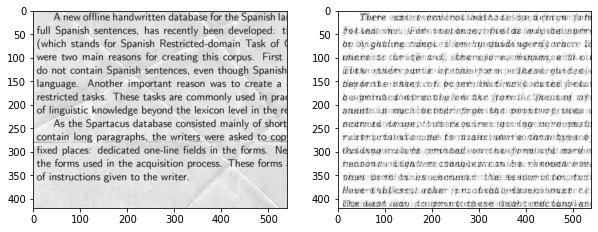

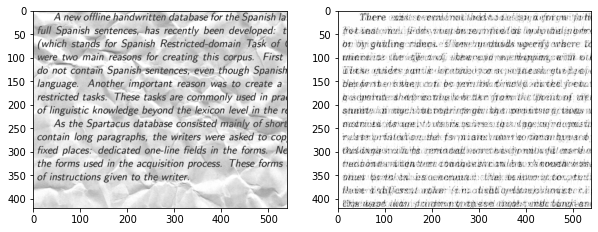

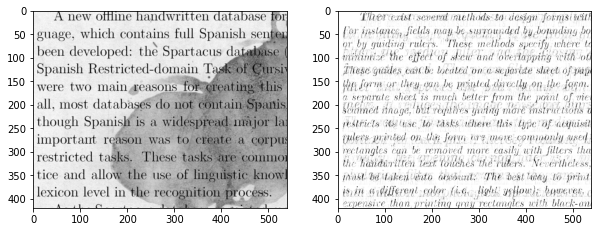

In [10]:
# Compute the prediction
predicted_label = np.squeeze(txt_dense_autoencoder.predict(X_test_reshp))

for i in range(5):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test_reshp[i].reshape(420, 540)), cmap='gray')
  ax[1].imshow(predicted_label[i].reshape(420, 540), cmap='gray')
plt.show()

## CNN MODEL

Encoder: ((64,5),(128,3))
          
Decoder: ((128,3),(64,5), (1,3))

activation function: leaky_relu in every dense layer, sigmoid in decoder output layer

kernel_initializer: he_normal with every dense layer

Batch normalization after every Convolution layer

loss function: RMSE

Optimizer: Adam

Learning rate: 1e-3

Batch size: 20

Callback

In [ ]:
def cnn_txt_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1),name='image_input')
  x = tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.leaky_relu, padding='same', kernel_initializer='he_normal')(input_img) #added kernel initializer
  x = tf.keras.layers.BatchNormalization()(x) #added batch normalization
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same', kernel_initializer='he_normal')(x) #added kernel initializer
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  
  x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same', kernel_initializer='he_normal')(encoded) #added kernel initializer
  x = tf.keras.layers.BatchNormalization()(x) #added batch normalization
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.leaky_relu, padding='same', kernel_initializer='he_normal')(x) #added kernel initializer
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) #activation function sigmoid

  autoencoder = Model(inputs=input_img, outputs=decoded)
  autoencoder.compile(optimizer=Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #error rate 1e-3, loss: MSE
  return autoencoder

cnn_txt_autoencoder = cnn_txt_autoencoder()
 

In [ ]:
cnn_txt_autoencoder.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_valid, y_valid),  callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
7/7 [==============================] - 7s 807ms/step - loss: 0.2190 - root_mean_squared_error: 0.4680 - val_loss: 0.8592 - val_root_mean_squared_error: 0.9270
Epoch 2/100
7/7 [==============================] - 6s 794ms/step - loss: 0.1360 - root_mean_squared_error: 0.3688 - val_loss: 0.8038 - val_root_mean_squared_error: 0.8965
Epoch 3/100
7/7 [==============================] - 5s 777ms/step - loss: 0.1160 - root_mean_squared_error: 0.3407 - val_loss: 0.1008 - val_root_mean_squared_error: 0.3174
Epoch 4/100
7/7 [==============================] - 6s 783ms/step - loss: 0.1015 - root_mean_squared_error: 0.3186 - val_loss: 0.2811 - val_root_mean_squared_error: 0.5302
Epoch 5/100
7/7 [==============================] - 6s 801ms/step - loss: 0.0894 - root_mean_squared_error: 0.2990 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2842
Epoch 6/100
7/7 [==============================] - 6s 804ms/step - loss: 0.0784 - root_mean_squared_error: 0.2800 - val_loss: 0.1028 - val_root_m

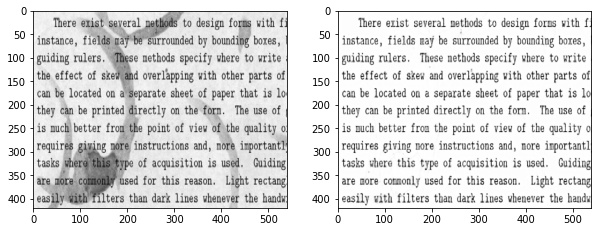

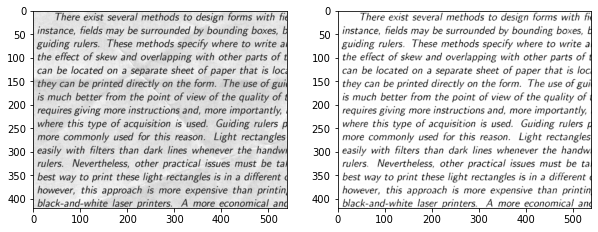

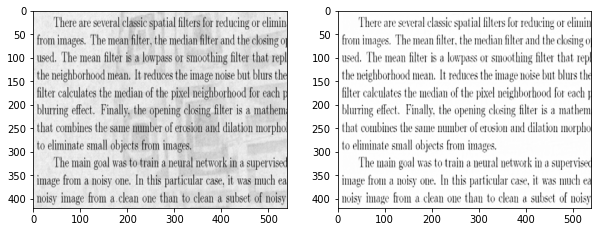

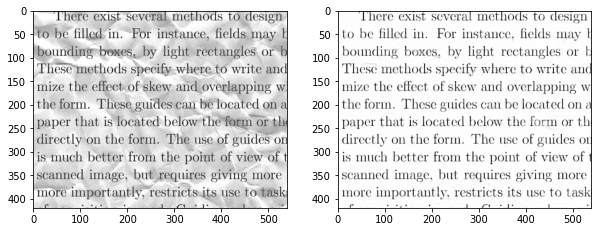

In [ ]:
predicted_label_1 = np.squeeze(cnn_txt_autoencoder.predict(X_valid))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_valid[i]), cmap='gray')
  ax[1].imshow(predicted_label_1[i], cmap='gray')
plt.show()

## CNN COMPLEX MODEL 1

Encoder
  
          ((128,3),(256,3))
         Drop-out (0.25) and Batch normalization after final max-pooling in Encoder layer      
Decoder

          ((256,3),(128,3), (1,3))
          Drop-out (0.25) after 1st upsampling
          Batch normalization before decoder output
activation function: 
                    
                    relu
                    sigmoid in decoder output

kernel_initializer: he_normal in every Convolution layer

r


loss function: RMSE

Optimizer: Adam

Learning rate: 1e-3

Batch size: 10

In [ ]:
from keras import regularizers

def cnn_txt_autoencdr_cmplx():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1),name='image_input')
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer='he_normal')(input_img) #added kernel initializer
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x) #added kernel initializer
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Dropout(0.25)(x) #Dropout
  x = tf.keras.layers.BatchNormalization()(x) #Batch normalization


  x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)  #added kernel initializer
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(0.25)(x) #Dropout
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x) #added kernel initializer
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.BatchNormalization()(x) #Batch normalization
  cnn_decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  #activation function sigmoid

  autoencoder = Model(inputs=input_img, outputs=cnn_decoded)
  autoencoder.compile(optimizer=Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #loss 1e-3
  return autoencoder

cnn_txt_autoencdr_cmplx = cnn_txt_autoencdr_cmplx()


In [ ]:

cnn_txt_autoencdr_cmplx.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid), shuffle=True)

Epoch 1/100
13/13 [==============================] - 11s 816ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2292
Epoch 2/100
13/13 [==============================] - 11s 827ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1798
Epoch 3/100
13/13 [==============================] - 11s 850ms/step - loss: 0.0214 - root_mean_squared_error: 0.1464 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 4/100
13/13 [==============================] - 11s 875ms/step - loss: 0.0181 - root_mean_squared_error: 0.1347 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1780
Epoch 5/100
13/13 [==============================] - 11s 865ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571
Epoch 6/100
13/13 [==============================] - 11s 845ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0

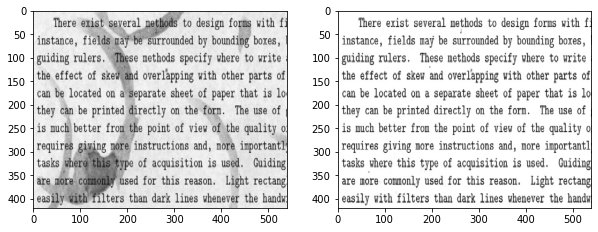

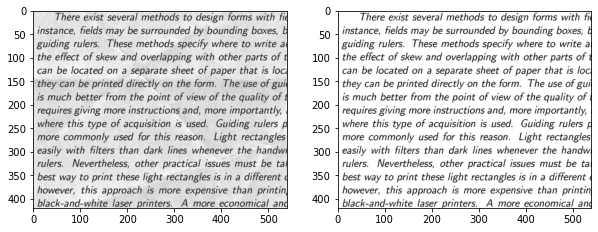

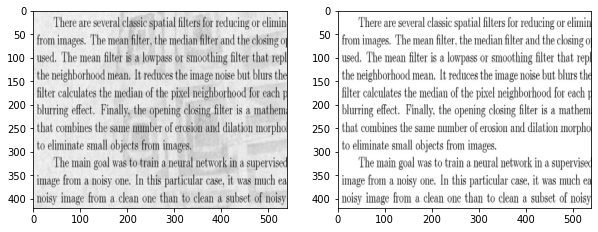

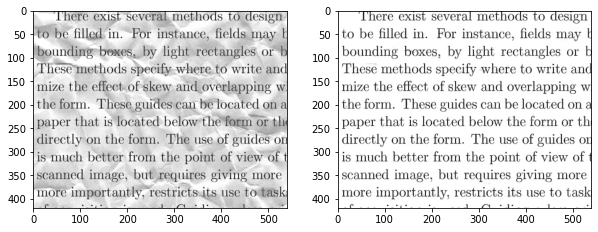

In [ ]:
predicted_label_2 = np.squeeze(cnn_txt_autoencdr_cmplx.predict(X_valid))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_valid[i]), cmap='gray')
  ax[1].imshow(predicted_label_2[i], cmap='gray')
plt.show()

## CNN COMPLEX MODEL 2

Encoder
  
          ((128,3),(256,3))
         Drop-out (0.25) and Batch normalization after final max-pooling in Encoder layer      
Decoder

          ((256,3),(128,3), (1,3))
          Drop-out (0.25) after 1st upsampling
          Batch normalization before decoder output
activation function: 
                    
                    relu in 1st and last hidden layer
                    leaky relu 2nd and 3rd hidden layer
                    sigmoid in decoder output

kernel_initializer: he_normal in every Convolution layer

loss function: RMSE

Optimizer: Adam

Learning rate: 1e-3

Batch size: 10

In [ ]:
import tensorflow as tf
from keras import regularizers

def cnn_txt_autoencdr_cmplx_2():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1),name='image_input')
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer='he_normal')(input_img)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same', kernel_initializer='he_normal')(x) #leaky relu
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Dropout(0.25)(x) #added dropout layer
  x = tf.keras.layers.BatchNormalization()(x) #added batch normalization


  x = tf.keras.layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same', kernel_initializer='he_normal')(x) #leaky rely
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(0.25)(x)
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.BatchNormalization()(x) #added batch normalization
  cnn_decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  #activation function sigmoid

  autoencoder = Model(inputs=input_img, outputs=cnn_decoded)
  autoencoder.compile(optimizer=Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #learning rate 1e-3
  return autoencoder

cnn_txt_autoencdr_cmplx_2 = cnn_txt_autoencdr_cmplx_2()

In [ ]:

cnn_txt_autoencdr_cmplx_2.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid), shuffle=True)

Epoch 1/100
13/13 [==============================] - 25s 2s/step - loss: 0.0251 - root_mean_squared_error: 0.1584 - val_loss: 0.0547 - val_root_mean_squared_error: 0.2339
Epoch 2/100
13/13 [==============================] - 25s 2s/step - loss: 0.0218 - root_mean_squared_error: 0.1475 - val_loss: 0.0506 - val_root_mean_squared_error: 0.2250
Epoch 3/100
13/13 [==============================] - 25s 2s/step - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2386
Epoch 4/100
13/13 [==============================] - 25s 2s/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2367
Epoch 5/100
13/13 [==============================] - 25s 2s/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2203
Epoch 6/100
13/13 [==============================] - 25s 2s/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0514 - val_root_m

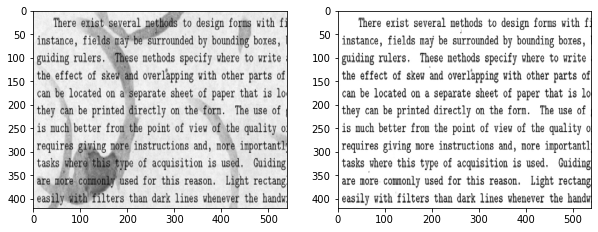

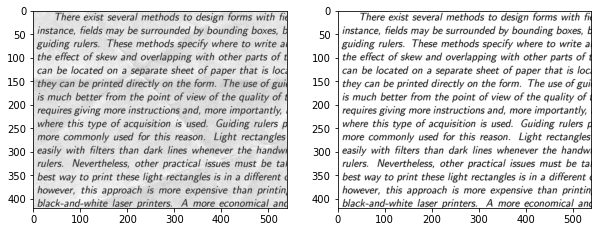

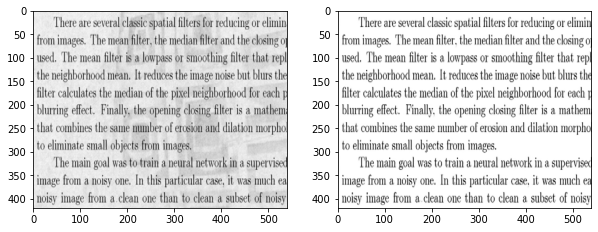

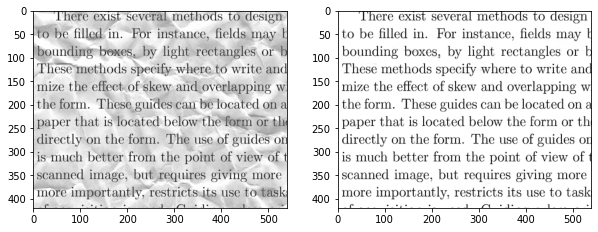

In [ ]:
predicted_label_3 = np.squeeze(cnn_txt_autoencdr_cmplx_2.predict(X_valid))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_valid[i]), cmap='gray')
  ax[1].imshow(predicted_label_3[i], cmap='gray')
plt.show()